In [1]:
import sys; sys.path.append('../../')
from DataPreparation.DataPreparation import read_data
from ModelPipelines.ModelAnalysis import recursive_feature_elimination, test_log_linearity, show_hyperparams, vc_dimension_check,validation_curves,learning_curves
from sklearn.linear_model import LogisticRegression
from ClassImbalanceHandle.ClassImbalanceHandle import *
import numpy as np
from sklearn.model_selection import cross_val_predict
from mlpath import mlquest as mlq
from utils import nice_table
from IPython.display import display, HTML


### Initialize Model

In [2]:
x_data_d, y_data_d = read_data(kind='Numerical')
clf = LogisticRegression(multi_class='multinomial')
clf.fit(x_data_d, y_data_d)

LogisticRegression(multi_class='multinomial')

### Hyperparameters

In [3]:
show_hyperparams(clf)

C,1.0
class_weight,None
dual,False
fit_intercept,True
intercept_scaling,1
l1_ratio,None
max_iter,100
multi_class,multinomial
n_jobs,None
penalty,l2
random_state,None


### VC Dimension

In [4]:
vc_dimension_check(clf, x_data_d)

Model generalization is safe. VC Bound is satisfied where 10dvc=370 < N=1180


### Recursive Feature Elimination

In [5]:
recursive_feature_elimination(clf, min_feats=1, cv=5, x_data_d=x_data_d, y_data_d=y_data_d)

Features to keep ['Age' 'Height' 'Weight' 'Veg_Consump']


ModuleNotFoundError: No module named 'matplotlib_inline'

### Test Log-Linearity

In [ ]:
test_log_linearity(clf, class_index=3, x_data_d=x_data_d, y_data_d=y_data_d)

# Handling class imbalance

1- oversampling

In [7]:
methods=['no resampling', 'SMOTE','BorderlineSMOTE','under','cost']
accuracies = []
for method in methods:
    if method == "cost":
        w = handle_class_imbalance(x_data_d, y_data_d, method=method,k=5)
        clf = LogisticRegression(multi_class='multinomial', class_weight=w)
        clf.fit(x_data_d, y_data_d)
        y_pred = mlq.l(cross_val_predict)(clf, x_data_d, y_data_d, cv=4)
        accuracies.append( np.mean(y_pred == y_data_d))
    else:
        bal_x, bal_y = handle_class_imbalance(x_data_d, y_data_d, method=method,k=5)
        clf = LogisticRegression(multi_class='multinomial')
        clf.fit(bal_x, bal_y)
        y_pred = mlq.l(cross_val_predict)(clf, bal_x, bal_y, cv=4)
        accuracies.append( np.mean(y_pred == bal_y))
    


c:\Users\dell\AppData\Local\Programs\Python\Python38\lib\site-packages\mlpath\mlquest\mlquest.py:115: UserWarning: Attempting to log a function when no run is active will do nothing
  warnings.warn("Attempting to log a function when no run is active will do nothing")
c:\Users\dell\AppData\Local\Programs\Python\Python38\lib\site-packages\mlpath\mlquest\mlquest.py:115: UserWarning: Attempting to log a function when no run is active will do nothing
  warnings.warn("Attempting to log a function when no run is active will do nothing")
c:\Users\dell\AppData\Local\Programs\Python\Python38\lib\site-packages\mlpath\mlquest\mlquest.py:115: UserWarning: Attempting to log a function when no run is active will do nothing
  warnings.warn("Attempting to log a function when no run is active will do nothing")
c:\Users\dell\AppData\Local\Programs\Python\Python38\lib\site-packages\mlpath\mlquest\mlquest.py:115: UserWarning: Attempting to log a function when no run is active will do nothing
  warnings.war

In [8]:
show_results(accuracies, methods,title="Resampling")

,Method,Accuracy
0,no resampling,0.933051
1,SMOTE,0.960478
2,BorderlineSMOTE,0.965533
3,under,0.914474
4,cost,0.668644


2-SMOTE with const k and multiple sample strategy

In [9]:
methods=['SMOTE','SMOTE','SMOTE','SMOTE']
sampling_ratios=[[1,1,1],[0.5,0.6,0.9] , [0.4,0.5,.8] , [0.7,0.8,1]]
accuracies = []
for i,r in enumerate(sampling_ratios):
    bal_x, bal_y = handle_class_imbalance(x_data_d, y_data_d, method="SMOTE",k=5, sampling_ratio=sampling_ratios[i])
    clf = LogisticRegression(multi_class='multinomial')
    clf.fit(bal_x, bal_y)
    y_pred = mlq.l(cross_val_predict)(clf, bal_x, bal_y, cv=4)
    accuracies.append( np.mean(y_pred == bal_y))

c:\Users\dell\AppData\Local\Programs\Python\Python38\lib\site-packages\mlpath\mlquest\mlquest.py:115: UserWarning: Attempting to log a function when no run is active will do nothing
  warnings.warn("Attempting to log a function when no run is active will do nothing")
c:\Users\dell\AppData\Local\Programs\Python\Python38\lib\site-packages\mlpath\mlquest\mlquest.py:115: UserWarning: Attempting to log a function when no run is active will do nothing
  warnings.warn("Attempting to log a function when no run is active will do nothing")
c:\Users\dell\AppData\Local\Programs\Python\Python38\lib\site-packages\mlpath\mlquest\mlquest.py:115: UserWarning: Attempting to log a function when no run is active will do nothing
  warnings.warn("Attempting to log a function when no run is active will do nothing")
c:\Users\dell\AppData\Local\Programs\Python\Python38\lib\site-packages\mlpath\mlquest\mlquest.py:115: UserWarning: Attempting to log a function when no run is active will do nothing
  warnings.war

In [10]:
show_results(accuracies, methods, sample_ratio= sampling_ratios, title="SMOTE, k=5")

,Method,Sampling Ratio,Accuracy
0,SMOTE,"[1, 1, 1]",0.965533
1,SMOTE,"[0.5, 0.6, 0.9]",0.957082
2,SMOTE,"[0.4, 0.5, 0.8]",0.944823
3,SMOTE,"[0.7, 0.8, 1]",0.956910


2-SMOTE with const sample strategy and multiple values of k

In [11]:
Ks=[5,15,25,70]
sampling_ratio=[0.5,0.6,0.9]
accuracies = []
for i,k in enumerate(Ks):
    bal_x, bal_y = handle_class_imbalance(x_data_d, y_data_d, method="SMOTE",k=k, sampling_ratio=sampling_ratio)
    clf = LogisticRegression(multi_class='multinomial')
    clf.fit(bal_x, bal_y)
    y_pred = mlq.l(cross_val_predict)(clf, bal_x, bal_y, cv=4)
    accuracies.append( np.mean(y_pred == bal_y))

c:\Users\dell\AppData\Local\Programs\Python\Python38\lib\site-packages\mlpath\mlquest\mlquest.py:115: UserWarning: Attempting to log a function when no run is active will do nothing
  warnings.warn("Attempting to log a function when no run is active will do nothing")
c:\Users\dell\AppData\Local\Programs\Python\Python38\lib\site-packages\mlpath\mlquest\mlquest.py:115: UserWarning: Attempting to log a function when no run is active will do nothing
  warnings.warn("Attempting to log a function when no run is active will do nothing")
c:\Users\dell\AppData\Local\Programs\Python\Python38\lib\site-packages\mlpath\mlquest\mlquest.py:115: UserWarning: Attempting to log a function when no run is active will do nothing
  warnings.warn("Attempting to log a function when no run is active will do nothing")
c:\Users\dell\AppData\Local\Programs\Python\Python38\lib\site-packages\mlpath\mlquest\mlquest.py:115: UserWarning: Attempting to log a function when no run is active will do nothing
  warnings.war

In [12]:
show_results(accuracies, methods,k=Ks, title="SMOTE, k=5")

,Method,K,Accuracy
0,SMOTE,5,0.955242
1,SMOTE,15,0.950337
2,SMOTE,25,0.954016
3,SMOTE,70,0.951563


4- BorderlineSMOTE with const k and multiple sample strategy

In [13]:
methods=['BorderlineSMOTE','BorderlineSMOTE','BorderlineSMOTE','BorderlineSMOTE']
sampling_ratios=[[1,1,1],[0.5,0.6,0.9] , [0.4,0.5,.8] , [0.7,0.8,1]]
accuracies = []
for i,r in enumerate(sampling_ratios):
    bal_x, bal_y = handle_class_imbalance(x_data_d, y_data_d, method="BorderlineSMOTE",k=5, sampling_ratio=sampling_ratios[i])
    clf = LogisticRegression(multi_class='multinomial')
    clf.fit(bal_x, bal_y)
    y_pred = mlq.l(cross_val_predict)(clf, bal_x, bal_y, cv=4)
    accuracies.append( np.mean(y_pred == bal_y))

c:\Users\dell\AppData\Local\Programs\Python\Python38\lib\site-packages\mlpath\mlquest\mlquest.py:115: UserWarning: Attempting to log a function when no run is active will do nothing
  warnings.warn("Attempting to log a function when no run is active will do nothing")
c:\Users\dell\AppData\Local\Programs\Python\Python38\lib\site-packages\mlpath\mlquest\mlquest.py:115: UserWarning: Attempting to log a function when no run is active will do nothing
  warnings.warn("Attempting to log a function when no run is active will do nothing")
c:\Users\dell\AppData\Local\Programs\Python\Python38\lib\site-packages\mlpath\mlquest\mlquest.py:115: UserWarning: Attempting to log a function when no run is active will do nothing
  warnings.warn("Attempting to log a function when no run is active will do nothing")
c:\Users\dell\AppData\Local\Programs\Python\Python38\lib\site-packages\mlpath\mlquest\mlquest.py:115: UserWarning: Attempting to log a function when no run is active will do nothing
  warnings.war

In [14]:
show_results(accuracies, methods, sample_ratio= sampling_ratios, title="BorderlineSMOTE, k=5")

,Method,Sampling Ratio,Accuracy
0,BorderlineSMOTE,"[1, 1, 1]",0.964154
1,BorderlineSMOTE,"[0.5, 0.6, 0.9]",0.952790
2,BorderlineSMOTE,"[0.4, 0.5, 0.8]",0.946866
3,BorderlineSMOTE,"[0.7, 0.8, 1]",0.957436


5- BorderlineSMOTE with const sample strategy and multiple k values

In [15]:
Ks=[5,15,25,50]
sampling_ratio=[0.5,0.6,0.9]
accuracies = []
for i,k in enumerate(Ks):
    bal_x, bal_y = handle_class_imbalance(x_data_d, y_data_d, method="BorderlineSMOTE",k=k, sampling_ratio=sampling_ratio)
    clf = LogisticRegression(multi_class='multinomial')
    clf.fit(bal_x, bal_y)
    y_pred = mlq.l(cross_val_predict)(clf, bal_x, bal_y, cv=4)
    accuracies.append( np.mean(y_pred == bal_y))

c:\Users\dell\AppData\Local\Programs\Python\Python38\lib\site-packages\mlpath\mlquest\mlquest.py:115: UserWarning: Attempting to log a function when no run is active will do nothing
  warnings.warn("Attempting to log a function when no run is active will do nothing")
c:\Users\dell\AppData\Local\Programs\Python\Python38\lib\site-packages\mlpath\mlquest\mlquest.py:115: UserWarning: Attempting to log a function when no run is active will do nothing
  warnings.warn("Attempting to log a function when no run is active will do nothing")
c:\Users\dell\AppData\Local\Programs\Python\Python38\lib\site-packages\mlpath\mlquest\mlquest.py:115: UserWarning: Attempting to log a function when no run is active will do nothing
  warnings.warn("Attempting to log a function when no run is active will do nothing")
c:\Users\dell\AppData\Local\Programs\Python\Python38\lib\site-packages\mlpath\mlquest\mlquest.py:115: UserWarning: Attempting to log a function when no run is active will do nothing
  warnings.war

In [16]:
show_results(accuracies, methods,k=Ks, title="SMOTE, k=5")

,Method,K,Accuracy
0,BorderlineSMOTE,5,0.952177
1,BorderlineSMOTE,15,0.954629
2,BorderlineSMOTE,25,0.951563
3,BorderlineSMOTE,50,0.949111


### Validation Curve

Optimal C is around: 92.6530612244898


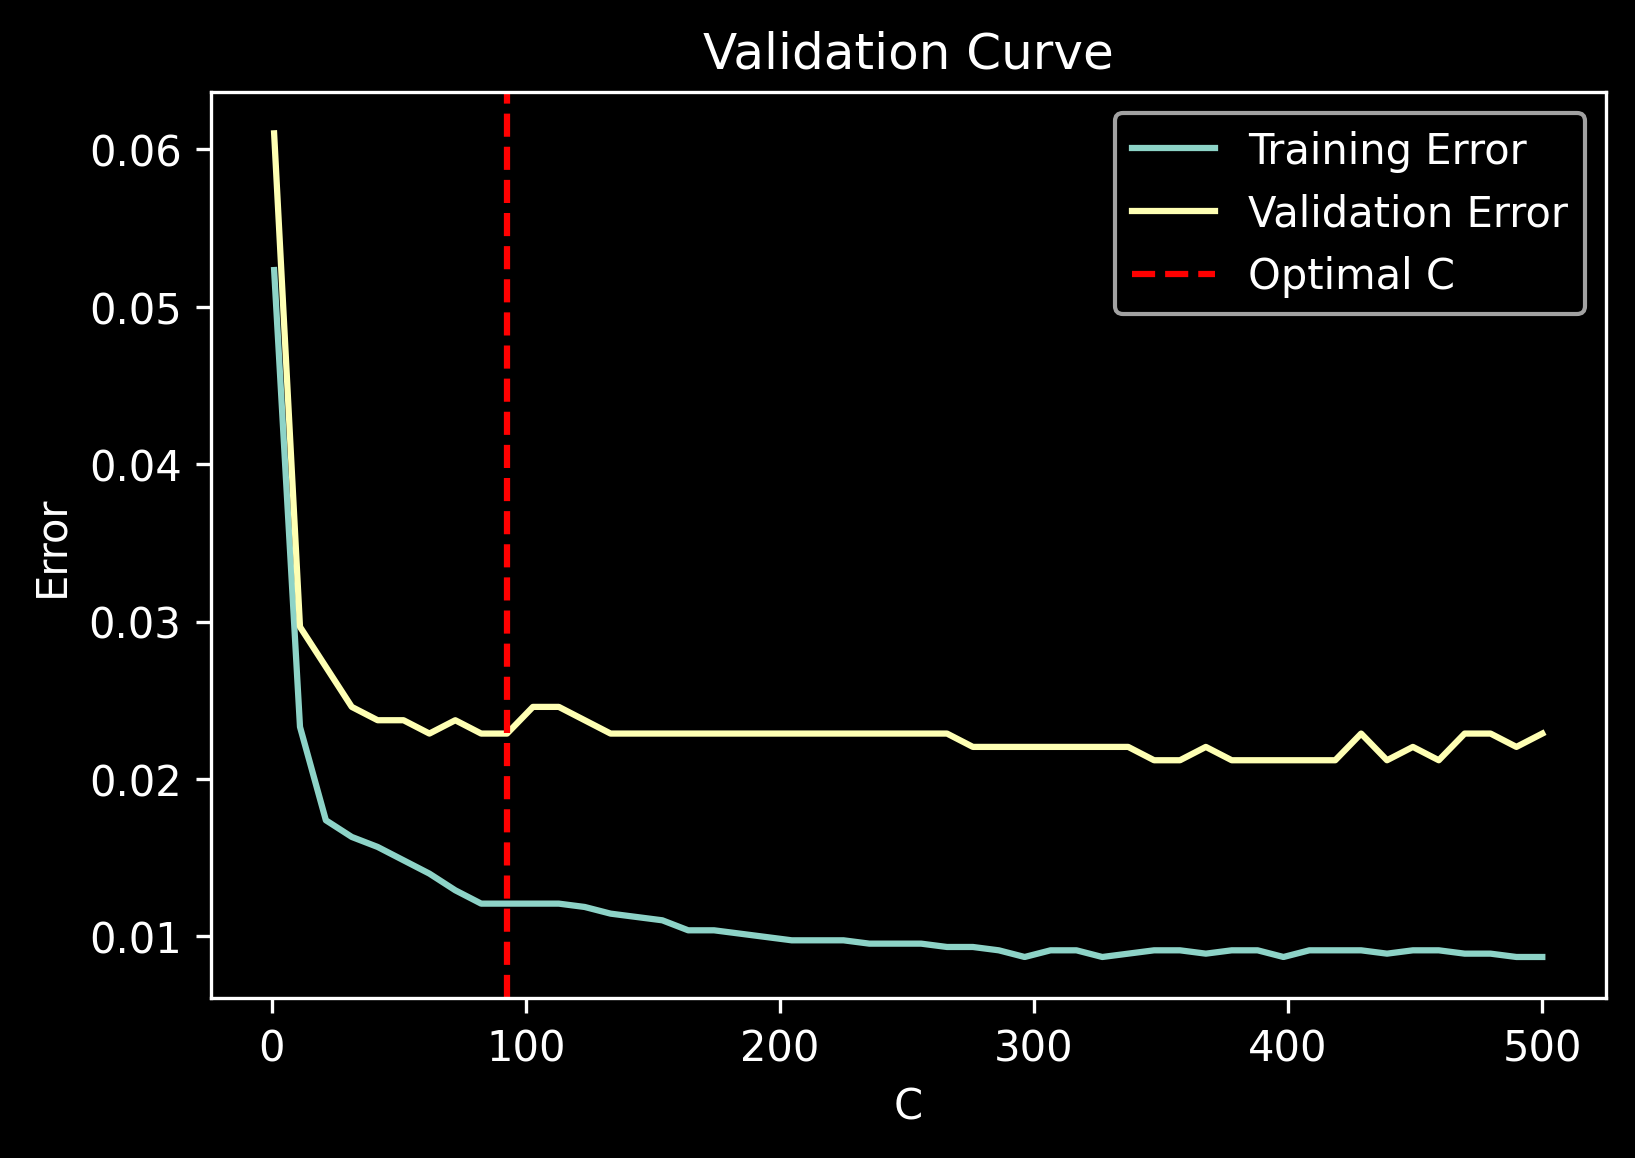

Overfitting measure
newton-cg : 0.008686440677966104
lbfgs : 0.008686440677966104
liblinear : nan
sag : 0.008686440677966104
saga : 0.009533898305084741


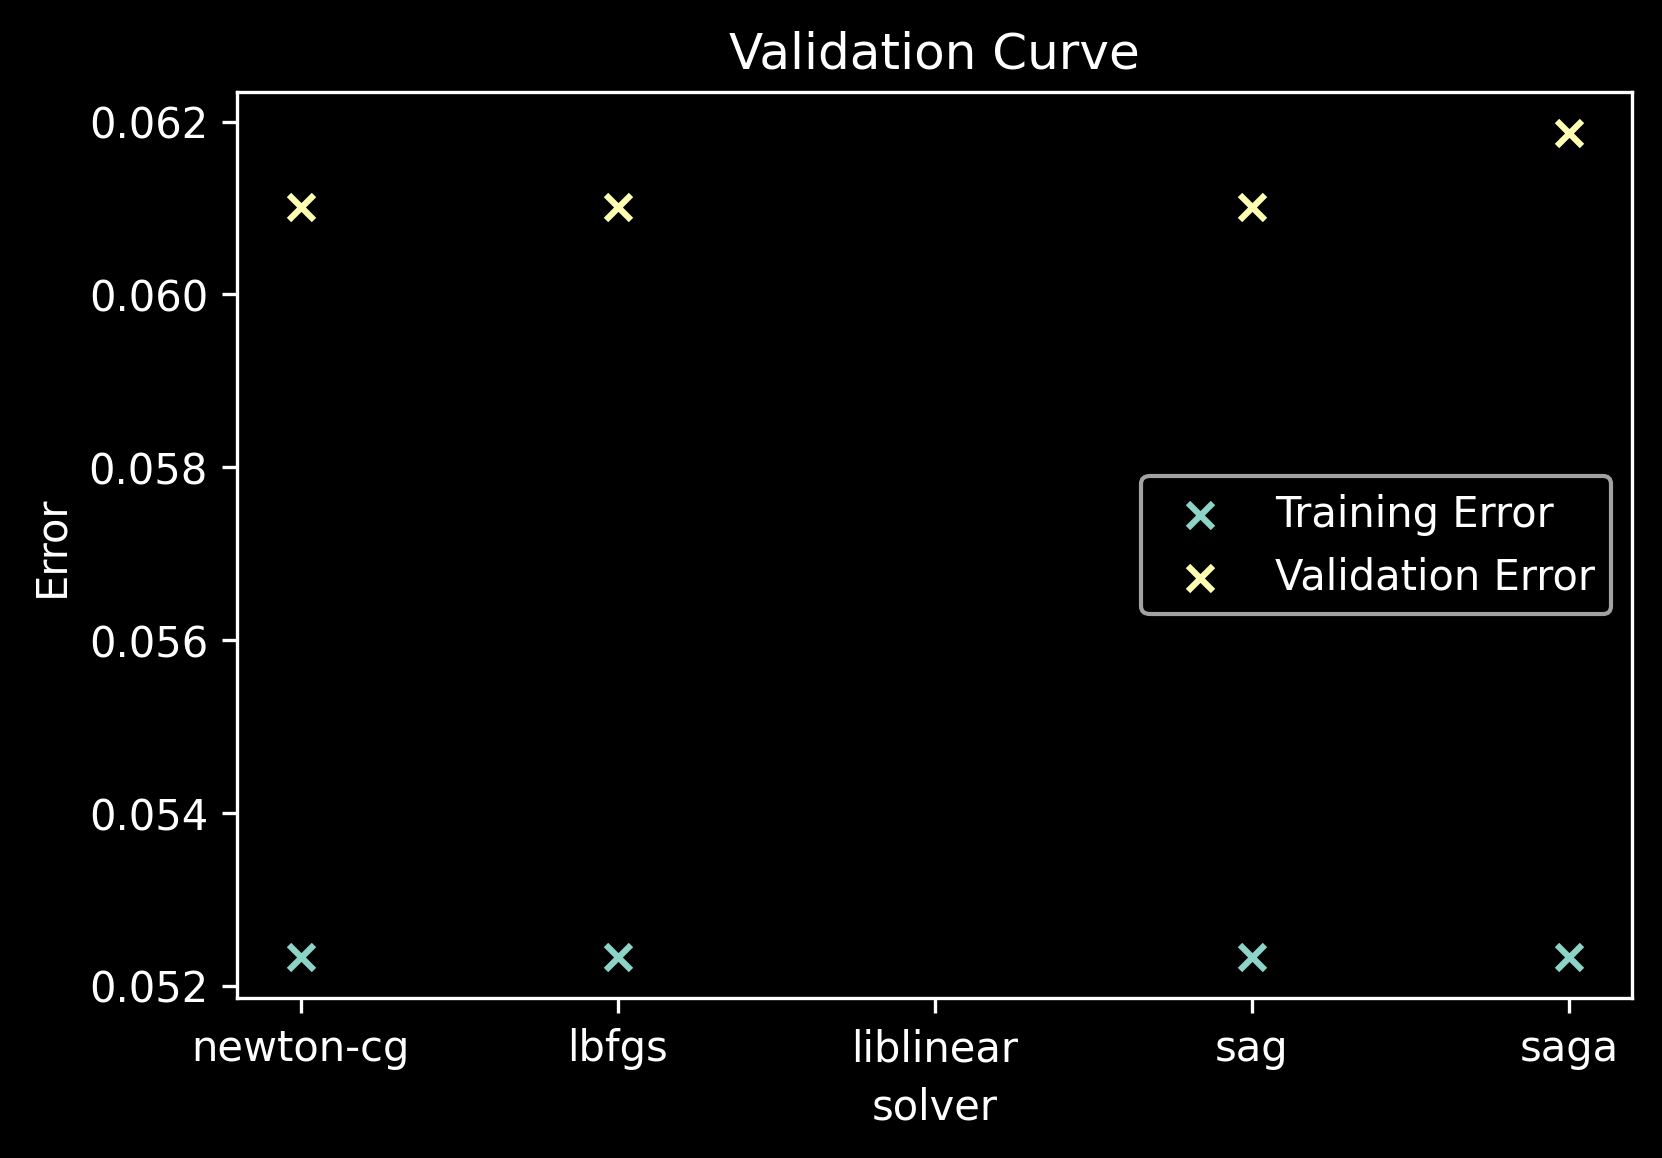

Overfitting measure
l1 : nan
l2 : 0.008686440677966104
elasticnet : nan
none : 0.012923728813559321


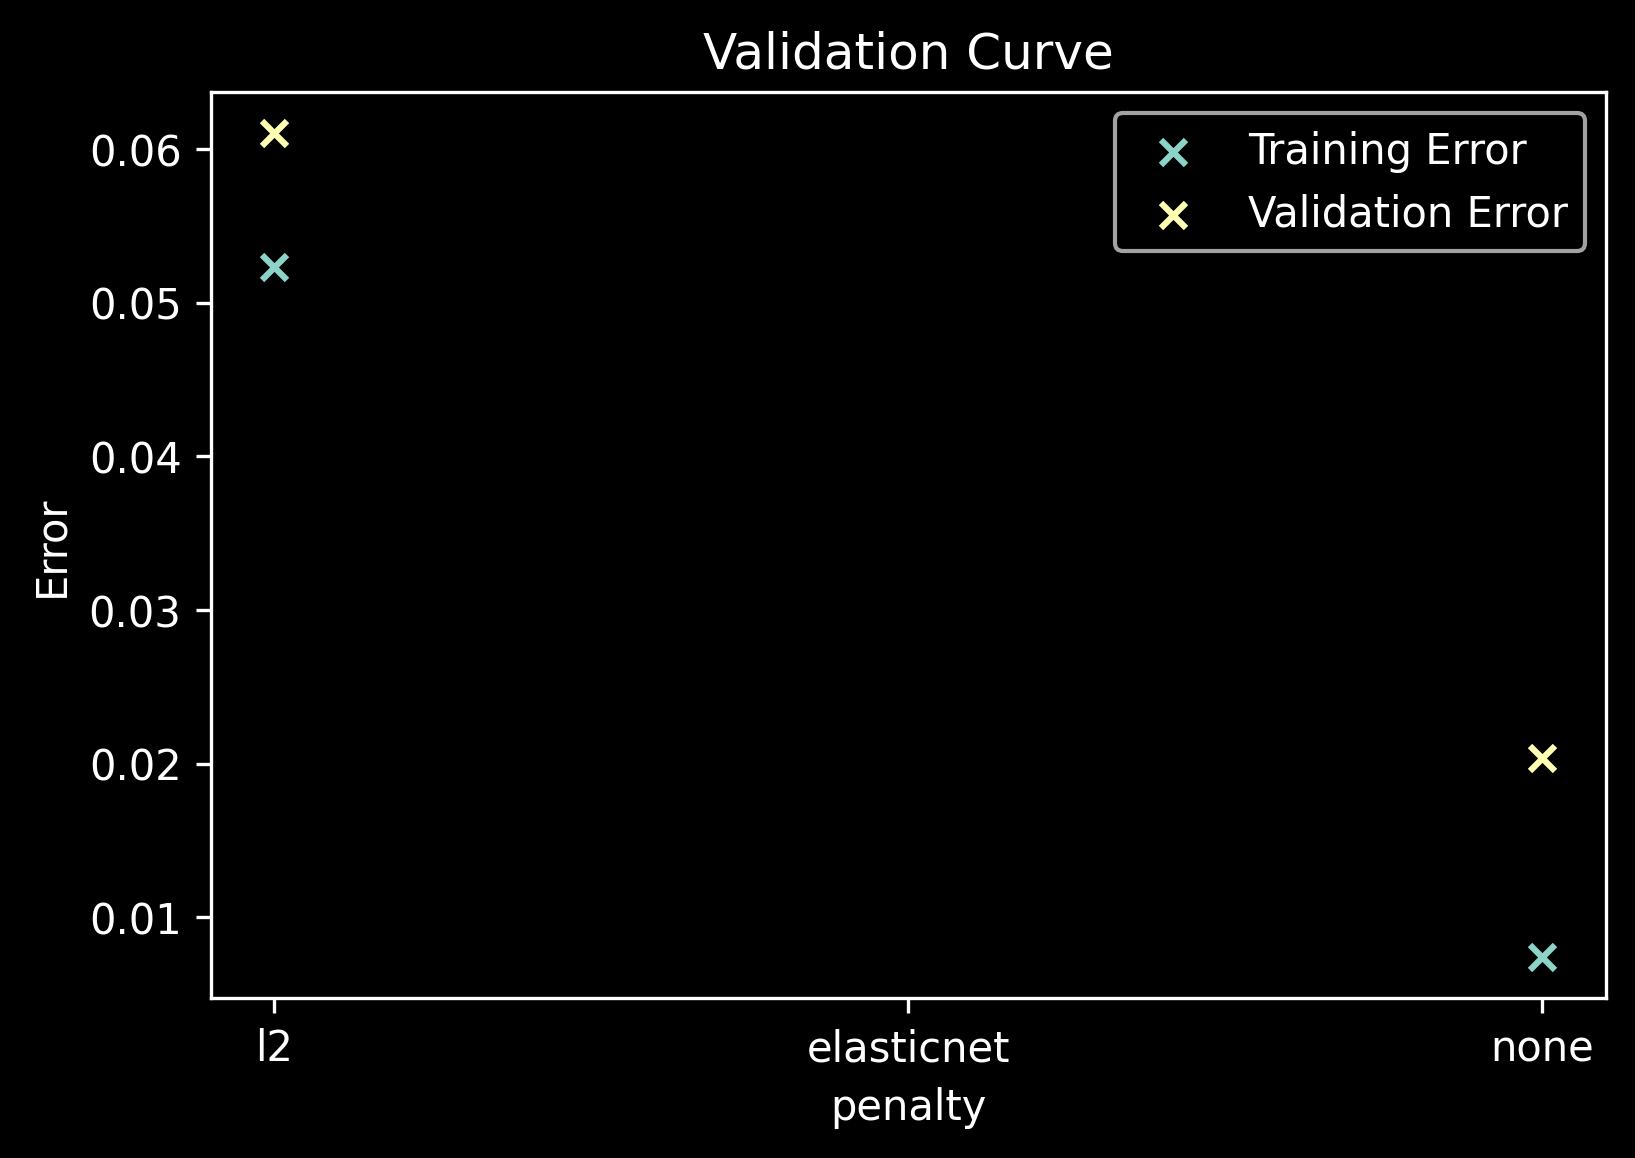

In [ ]:
C = np.linspace(1, 500, 50)
validation_curves(clf, x_data_d, y_data_d,5, "C",C)

solver = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
validation_curves(clf, x_data_d, y_data_d,5, "solver",solver,categorical=True)

penalty = ['l1', 'l2', 'elasticnet', 'none']
validation_curves(clf, x_data_d, y_data_d,5, "penalty",penalty, categorical=True)

### Learning Curve

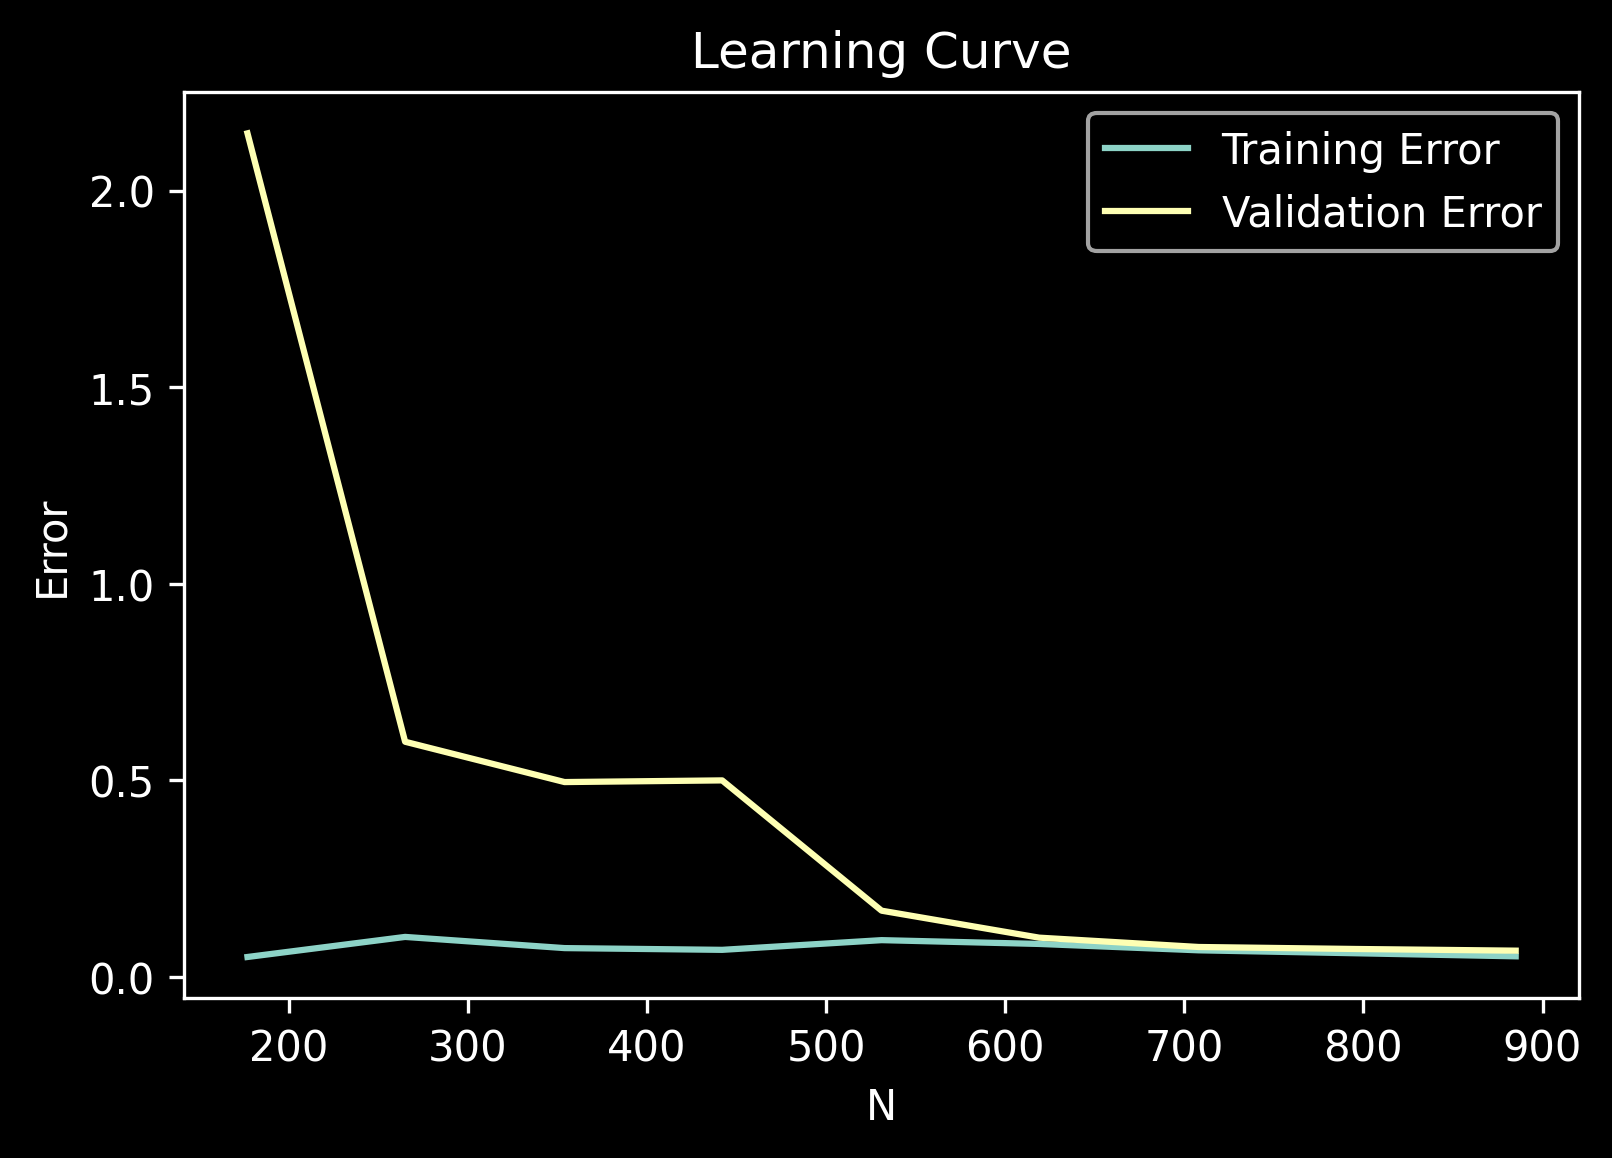

In [ ]:
train_sizes=np.linspace(0.1, 1.0, 10)
learning_curves(clf, x_data_d, y_data_d, cv=4,N=train_sizes)